# Movies on Netflix, Hulu, Prime Video and Disney+ Data Visualization

## Finding the Reason for high rating in a cirten region

## ** The dataset that has been used here is taken from kaggle **

In [1]:
import pandas as pd
import numpy as np

import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

# plt.style.use('seaborn-whitegrid')

from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

from scipy import stats
from scipy.stats import norm
from math import sqrt


## The Top 10

In [2]:
#Creating a dataframe usin the csv
movie = pd.read_csv('movies.csv')

# Remove "Unnamed" 
movie=movie.drop("Unnamed: 0",axis=1)

movie.head(n=10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,6,Spider-Man: Into the Spider-Verse,2018,7+,8.4,97%,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,7,The Pianist,2002,18+,8.5,95%,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,8,Django Unchained,2012,18+,8.4,87%,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,9,Raiders of the Lost Ark,1981,7+,8.4,95%,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,10,Inglourious Basterds,2009,18+,8.3,89%,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [3]:
#Description overview of the data
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               16744 non-null  int64  
 1   Title            16744 non-null  object 
 2   Year             16744 non-null  int64  
 3   Age              7354 non-null   object 
 4   IMDb             16173 non-null  float64
 5   Rotten Tomatoes  5158 non-null   object 
 6   Netflix          16744 non-null  int64  
 7   Hulu             16744 non-null  int64  
 8   Prime Video      16744 non-null  int64  
 9   Disney+          16744 non-null  int64  
 10  Type             16744 non-null  int64  
 11  Directors        16018 non-null  object 
 12  Genres           16469 non-null  object 
 13  Country          16309 non-null  object 
 14  Language         16145 non-null  object 
 15  Runtime          16152 non-null  float64
dtypes: float64(2), int64(7), object(7)
memory usage: 2.0+ MB


In [4]:
#Check for total no.of null values in each column 
movie.isna().sum()

ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

# Top 5 Genres

In [5]:
movie['Genres'].value_counts().head()


Drama           1341
Documentary     1229
Comedy          1040
Comedy,Drama     446
Horror           436
Name: Genres, dtype: int64

 ### So from here we can note that, in the overall basis we have Drama genre the most. 

In [6]:
movie[movie['Netflix'] == 1]['Genres'].value_counts().head()

Comedy                  424
Drama                   259
Documentary             241
Comedy,Drama            129
Comedy,Drama,Romance    100
Name: Genres, dtype: int64

### Here we can say that we have the Comedy genre the most in Netflix

In [7]:
movie[movie['Hulu'] == 1]['Genres'].value_counts().head()

Documentary             75
Drama                   44
Comedy,Drama            38
Comedy                  36
Comedy,Drama,Romance    30
Name: Genres, dtype: int64

### Here we see that we have Documentary Genre as the most rated in HULU

In [8]:
movie[movie['Prime Video'] == 1]['Genres'].value_counts().head()

Drama           1069
Documentary      900
Comedy           622
Horror           400
Comedy,Drama     302
Name: Genres, dtype: int64

### Here we see that Drama is most rated on Prime Video

In [9]:
movie[movie['Disney+']==1]['Genres'].value_counts().head()

Documentary                                  34
Animation,Adventure,Comedy,Family,Fantasy    16
Comedy,Family                                13
Action,Adventure,Sci-Fi                      13
Comedy,Drama,Family                          13
Name: Genres, dtype: int64

### Here we have the Documentary genre the most in Disney+

In [10]:
movie['Country'].value_counts().head()

United States     8776
India             1064
United Kingdom     905
Canada             555
Australia          202
Name: Country, dtype: int64

### Here we see that the most consumed OTT Media is United States and India

<AxesSubplot:>

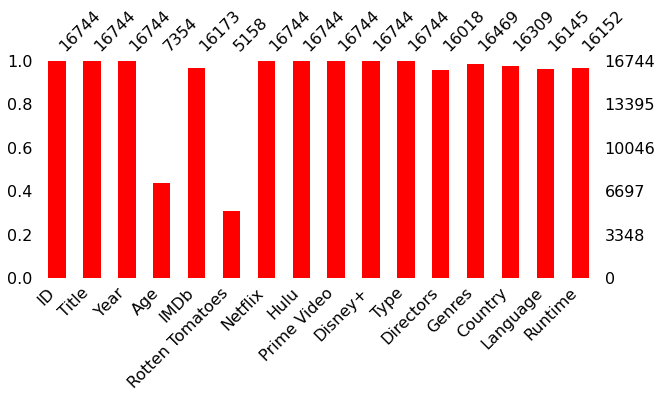

In [11]:
#Visualizing the amount of missing data
msno.bar(movie ,color='red', figsize=(10, 4))

## We see that there is some age data and data reguarding Rotten Tomatoes rating is missing

### ** So we have to decide if we want to drop the missing data or not
        lets drop Rotten Tomatoes Rating Since its extensively low
        and as for age data might be irrelevant (because in age groups lower than 18 
        a chunk of content is "Unavailable" ) and hence biases can be formed

In [12]:
#Dropping "Rotten Tomatoes" for its excessively low data 
movie = movie.drop(['Rotten Tomatoes'], axis=1)

In [13]:
#"Title" and "Type" are dropped as it is irrelevant for our prediction.
movie = movie.drop(['Title','Type'], axis=1)
movie.isna().sum()

ID                0
Year              0
Age            9390
IMDb            571
Netflix           0
Hulu              0
Prime Video       0
Disney+           0
Directors       726
Genres          275
Country         435
Language        599
Runtime         592
dtype: int64

In [14]:
#Checking unique values in "Age" 
movie['Age'].unique()

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [15]:
#Imputing null values in "Age" with "all"
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value="all")
movie["Age"] = imputer.fit_transform(movie[["Age"]]).ravel()

movie.isna().sum()

ID               0
Year             0
Age              0
IMDb           571
Netflix          0
Hulu             0
Prime Video      0
Disney+          0
Directors      726
Genres         275
Country        435
Language       599
Runtime        592
dtype: int64

In [16]:
#Dropping all the rows(entries) where there are celss with no data 
movie.dropna(axis=0, how='any',inplace=True)

movie.isna().sum()

ID             0
Year           0
Age            0
IMDb           0
Netflix        0
Hulu           0
Prime Video    0
Disney+        0
Directors      0
Genres         0
Country        0
Language       0
Runtime        0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15233 entries, 0 to 16740
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           15233 non-null  int64  
 1   Year         15233 non-null  int64  
 2   Age          15233 non-null  object 
 3   IMDb         15233 non-null  float64
 4   Netflix      15233 non-null  int64  
 5   Hulu         15233 non-null  int64  
 6   Prime Video  15233 non-null  int64  
 7   Disney+      15233 non-null  int64  
 8   Directors    15233 non-null  object 
 9   Genres       15233 non-null  object 
 10  Country      15233 non-null  object 
 11  Language     15233 non-null  object 
 12  Runtime      15233 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 1.6+ MB


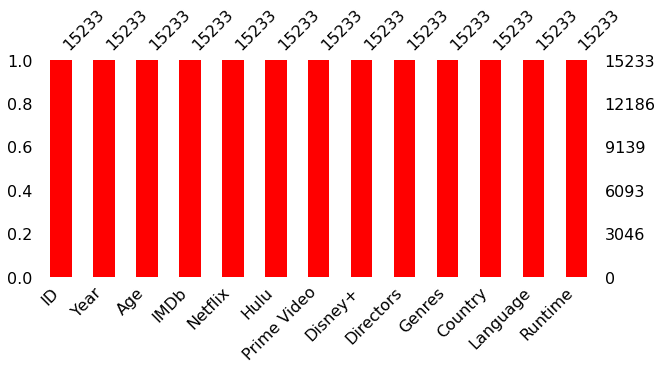

In [17]:
#Visualizing if there is anymore missing data or not
msno.bar(movie ,color='red', figsize=(10, 4))


# Description of the Data
movie.info()

In [18]:
# Choose target and features
y = movie.IMDb

X = movie.drop(['IMDb'], axis=1)

#Split the data for train and test
X_train_full, X_test_full, y_train, y_test  = train_test_split(X, y,random_state = 0)

#List of Categorical colunmns to be used as features
cat_cols=["Age","Directors","Genres","Country","Language"]

#List of Numerical colunmns to be used as features
numerical_cols = ['Year','Runtime']

#Keep selected columns only
my_cols = numerical_cols + cat_cols 
X_train = X_train_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [19]:
#Viewing Train data 
X_train.head()

,Year,Runtime,Age,Directors,Genres,Country,Language
13575,1972,88.0,18+,Vernon Zimmerman,"Action,Comedy,Drama,Sport",United States,English
9828,2011,93.0,13+,Nayan Padrai,"Comedy,Romance",United States,English
1255,2020,104.0,all,William Wyler,"Drama,Romance",United States,"English,French"
9799,2017,149.0,all,Boyapati Srinu,"Action,Romance",India,Telugu
11211,1941,66.0,all,Howard Bretherton,"Action,Adventure,Western",United States,English


In [20]:
#Viewing Test data
X_test.head()

,Year,Runtime,Age,Directors,Genres,Country,Language
8873,2016,90.0,all,Ross Kohn,Thriller,United States,English
12420,2016,87.0,all,Melissa Finell,Comedy,United States,English
8190,2018,79.0,all,Svend Ploug Johansen,Sci-Fi,United States,"English,Danish"
12795,2017,120.0,18+,Christopher Compton,"Action,Adventure,Drama",United States,English
4720,2018,136.0,all,Zhangke Jia,"Crime,Drama,Romance","China,France,Japan","Chinese,Mandarin"


In [21]:
#Copying the data to prevent change in original datset
label_X_train = X_train.copy()
label_X_test = X_test.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cat_cols:
    label_encoder.fit(pd.concat([label_X_train[col], label_X_test[col]], axis=0, sort=False))
    label_X_train[col] = label_encoder.transform(label_X_train[col])
    label_X_test[col] = label_encoder.transform(label_X_test[col])

In [22]:
# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=1)
model_2 = RandomForestRegressor(n_estimators=100, random_state=1)
model_3 = RandomForestRegressor(n_estimators=100, criterion='mae', random_state=1)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=1)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=1)

#Array of models
models = [model_1, model_2, model_3, model_4, model_5]

In [23]:
# Function for comparing different models
def score_model(model, X_t=label_X_train, X_v=label_X_test, y_t=y_train, y_v=y_test):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

mae_scores=[]

for i in range(0, len(models)):
    mae = score_model(models[i])
    print("Model %d MAE: %f" % (i+1, mae))
    mae_scores.append(mae)


best_score=min(mae_scores)
print("Best Score:\t" + str(best_score))

Model 1 MAE: 0.834569
Model 2 MAE: 0.831629
Model 3 MAE: 0.827311
Model 4 MAE: 0.812408
Model 5 MAE: 0.823894
Best Score:	0.8124076242731043


# Hypothesis Testing

Null hypothesis: There’s no significant difference in the proportion of well 
rated movies between movies from the XX and XXI century

H0: : μx - μy = 0

Alternative hypothesis: There’s significant difference in the proportion of 
well rated movies between movies from the XX and XXI century

HA: μx - μy != 0

In [24]:
# Different Data Frames Created so that It does not conflit with Hypothesis Testing

df = pd.read_csv("movies.csv")
df.drop(columns = "Unnamed: 0")
df2 = pd.read_csv("movies.csv")
df2.drop(columns = "Unnamed: 0")

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16741,The Poof Point,2001,7+,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


A one-tailed test is a statistical test in which the critical area of a distribution is

one-sided so that it is either greater than or less than a certain value, but not both. If the 

sample being tested falls into the one-sided critical area, the alternative hypothesis 

will be accepted instead of the null hypothesis.


A two-tailed test is a method in which the critical area of a distribution is 

two-sided and tests whether a sample is greater or less than a range of values. 

If the sample being tested falls into either of the critical areas, the alternative 

hypothesis is accepted instead of the null hypothesis.

In [25]:
def one_sided_mean_hypo(sample_mean_x,sample_mean_y,std_dev_x,std_dev_y,sample_size_x,sample_size_y,alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = ((sample_mean_x - sample_mean_y)/sqrt(((std_dev_x*std_dev_x)/(sample_size_x))+((std_dev_y*std_dev_y)/(sample_size_y))))
    print('actual_z:',actual_z)
    print('hypo_z:',hypo_z)
    if(hypo_z >= actual_z):
        return True
    else:
        return False



def two_sided_mean_hypo(sample_mean_x,sample_mean_y,std_dev_x,std_dev_y,sample_size_x,sample_size_y,alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = ((sample_mean_x - sample_mean_y)/sqrt(((std_dev_x*std_dev_x)/(sample_size_x))+((std_dev_y*std_dev_y)/(sample_size_y))))
    print('actual_z:',actual_z)
    print('hypo_z:',hypo_z)
    if(hypo_z >= actual_z or hypo_z <=-(actual_z)):
        return True
    else:
        return False

In [26]:
# Calcution of mean rating and standard deviation of movies released after 2000 form a sample size of 500

new_rating_sum = 0
new_rating_num = 0

for i, nrow in df.iterrows():
    if(nrow[3]>=2000 and new_rating_num<500):
        new_rating_num+=1
        if(nrow[5]>0):
            new_rating_sum+=nrow[5]
        

print(new_rating_num,new_rating_sum,new_rating_sum/new_rating_num);
new_rating_mean=new_rating_sum/new_rating_num

new_rating_std=0
new_rating_num=0
for i, row in df.iterrows():
    if(row[3]>2000 and new_rating_num<500):
        new_rating_num+=1
        if(row[5]>0):
            new_rating_std+= (row[5]-(new_rating_mean))*(row[5]-(new_rating_mean))

new_rating_std = new_rating_std/(new_rating_num)
new_rating_std = sqrt(new_rating_std)
print(new_rating_std)

500 3593.1999999999994 7.186399999999999
0.6108775327346715


In [27]:
rating_sum=0
rating_num=0

for i, row in df.iterrows():
    if(row[3]<2000 and rating_num<400):
        rating_num+=1
        if(row[5]>0):
            rating_sum+=row[5]
        

print(rating_num,rating_sum,rating_sum/rating_num);
rating_mean=rating_sum/rating_num

rating_std=0
rating_num=0;
for i, row in df.iterrows():
    if(row[3]<=2000 and rating_num<400 ):
        rating_num+=1;
        if(row[5]>0):
            rating_std+= (row[5]-(rating_mean))*(row[5]-(rating_mean))

rating_std = rating_std/(rating_num)
rating_std = sqrt(rating_std)
print(rating_std)

400 2736.0000000000023 6.840000000000006
0.9923824867459127


In accordance to our result employing a two tailed Z-test do suggest that there’s 

significant difference in the proportion of well rated movies between movies 

from the XX and XXI century.

In [28]:
alpha  = 0.05
sample_mean_x =  new_rating_mean
sample_mean_y = rating_mean
sample_size_x = new_rating_num
sample_size_y = rating_num
std_dev_x = new_rating_std
std_dev_y = rating_std

print("H0 : μx - μy = 0")
print('H1 : μx - μy != 0')
print("alpha value is :", alpha,'\n')

rej = two_sided_mean_hypo(sample_mean_x,sample_mean_y,std_dev_x,std_dev_y,sample_size_x,sample_size_y,alpha)
if rej:
    print("Reject NULL Hypothesis")
else:
    print("Failed to reject NULL hypothesis")

H0 : μx - μy = 0
H1 : μx - μy != 0
alpha value is : 0.05 

actual_z: 1.6448536269514729
hypo_z: 6.11552315156307
Reject NULL Hypothesis


# Visuals and Analysis

In [29]:
df.drop(columns = "ID", inplace = True)
df.drop(columns = "Type", inplace = True)

def cols(df_col):
    for c in df_col:
        if c != "Title":
            print("{} -> {}".format(c, df[c].dtype))
cols(df.columns.to_list())

df["Runtime"] = df["Runtime"].apply(lambda x: x//60)

Unnamed: 0 -> int64
Year -> int64
Age -> object
IMDb -> float64
Rotten Tomatoes -> object
Netflix -> int64
Hulu -> int64
Prime Video -> int64
Disney+ -> int64
Directors -> object
Genres -> object
Country -> object
Language -> object
Runtime -> float64


In [42]:
def vals(cols):
    print("\"NA values in Percentage\"")
    for c in cols:
        if c not in ["Title", "Directors"]:
            print("{} -> {}%".format(c, round(100*(df[c].isna().sum()/len(df)),2)))
vals(df.columns.to_list())

"NA values in Percentage"
Unnamed: 0 -> 0.0%
Year -> 0.0%
Age -> 56.08%
IMDb -> 3.41%
Rotten Tomatoes -> 69.19%
Netflix -> 0.0%
Hulu -> 0.0%
Prime Video -> 0.0%
Disney+ -> 0.0%
Genres -> 1.64%
Country -> 2.6%
Language -> 3.58%
Runtime -> 3.54%
Year_Bin -> 0.0%


In [31]:
# Boiler Plate code to set data Variables
df["Year"] = df["Year"].astype(int)
df["Year_Bin"] = df["Year"].apply(lambda x: "1919-1900" if x >= 1900 and x <= 1919 else "1939-1920" 
                                  if x >= 1920 and x <= 1939 else "1959 - 1940" if x >= 1940 and x <= 1959
                                  else "1979-1960" if x >= 1960 and x <= 1979 else "1999-1980" if x >= 1980 
                                  and x <= 1999 else "2020-2000")

df["Rotten Tomatoes"] = df["Rotten Tomatoes"].fillna("NA")
df["Rotten Tomatoes"] = df["Rotten Tomatoes"].apply(lambda x: x.strip("%"))

for row in df["Rotten Tomatoes"]:
    if row != "NA":
        df["Rotten Tomatoes"][row] = int(row)

df_tomatoes = df["Rotten Tomatoes"]
df_tomatoes.replace("NA", np.nan, inplace = True)
df_tomatoes.dropna(inplace = True)

df_tomatoes = df_tomatoes.astype(int)
df_tomatoes = df_tomatoes.apply(lambda x: "<20%" if x >= 0 and x < 20 else "20%-40%" 
                                if x >= 20 and x <= 40 else "41%60%" if x >= 41 and x <= 60
                                else "61%-80%" if x >= 61 and x <= 80 else ">81%")

df["IMDb"] = df["IMDb"].fillna("NA")

for row in df["IMDb"]:
    if row != "NA":
        df["IMDb"][row] = float(row)

df_imdb = df["IMDb"]
df_imdb.replace("NA", np.nan, inplace = True)
df_imdb.dropna(inplace = True)

df_imdb = df_imdb.astype(float)
df_imdb = df_imdb.apply(lambda x: "<2" if x >= 0.0 and x < 3.0 else "3-4" 
                                if x >= 3.0 and x < 5.0 else "5-6" if x >= 5.0 and x < 7.0
                                else "7-8" if x >= 7.0 and x < 9 else ">9")

df_chan = df[["Netflix", "Hulu", "Prime Video", "Disney+"]]

def dfchan(dfcol):
    df_chan[dfcol] = df_chan[dfcol].apply(lambda x: dfcol if x == 1 else "NA")
for col in df_chan.columns:
    dfchan(col)

Text(0, 0.5, 'No. of movies')

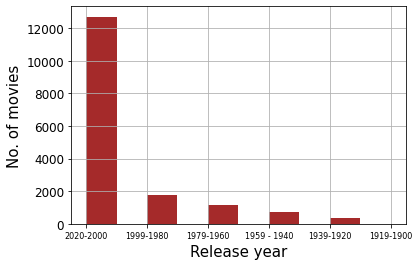

In [32]:
list_of_columns = [list(df.columns)] # Define columns
df['Year_Bin'].hist(grid=True, xlabelsize=8, ylabelsize=12, color = "brown")
plt.xlabel("Release year", fontsize=15)
plt.ylabel("No. of movies",fontsize=15)

Shows Growth in the number of movies released from 1900 to 2020 (Steady Increase Mosly because 

of Economic Boom and with the access of content easier the production rate also increased) Hence, 

This Proves a theory that with higher content consumption, content production increased.

Text(0, 0.5, 'No. of movies')

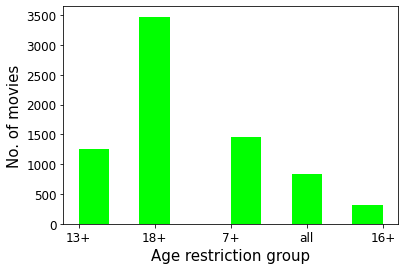

In [33]:
df['Age'].hist(grid=False, xlabelsize=12, ylabelsize=12, color = "lime")
plt.xlabel("Age restriction group", fontsize=15)
plt.ylabel("No. of movies",fontsize=15)

This Hints that with age ristrictions people over the age of 18 have the 

most amount of content that can be consumed

Text(0, 0.5, 'No. of movies')

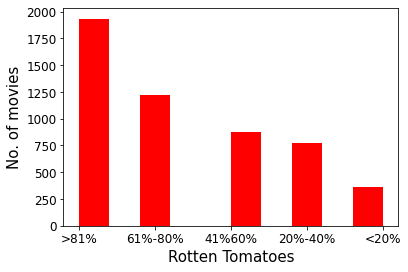

In [34]:
df_tomatoes.hist(grid=False, xlabelsize=12, ylabelsize=12, color = "red")
plt.xlabel("Rotten Tomatoes", fontsize=15)
plt.ylabel("No. of movies",fontsize=15)

Most movies produced have a more than 60% rattin on Rotton df_tomatoes

Hinting at a possible corolation with the movie demographic.

Text(0, 0.5, 'No. of movies')

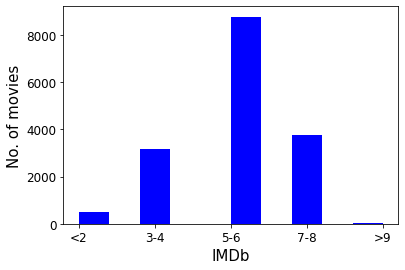

In [35]:
df_imdb.hist(grid=False, xlabelsize=12, ylabelsize=12, color = "blue")
plt.xlabel("IMDb", fontsize=15)
plt.ylabel("No. of movies",fontsize=15)

We see similar results to Rotton Tomatoes.

Providing with more evience that there is some corlaton with the demographic 

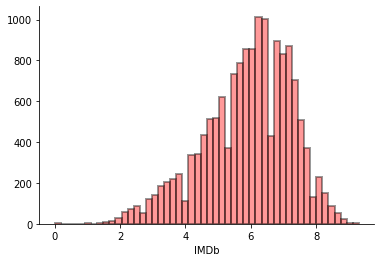

In [36]:
# Clearer Definition of the IMDB ratings
sns.distplot(movie['IMDb'], hist_kws=dict(edgecolor="k", linewidth=2), kde=False, color='red' )
sns.despine()

### IMDb rating in 4 platforms

In [37]:
# Boilerplate Code For generating plots
def func(x):
    if x==1:
        return x
def func2(x):
    s=x[0:len(x)-1]
    return int(s)
movie['Netflix']=movie['Netflix'].apply(lambda x:func(x))
movie['Hulu']=movie['Hulu'].apply(lambda x:func(x))
movie['Prime Video']=movie['Prime Video'].apply(lambda x:func(x))
movie['Disney+']=movie['Disney+'].apply(lambda x:func(x))
movie['c1']=movie['Age'].isnull()
movie['age']=movie[movie['c1']==False]['Age'].apply(lambda x: x[0:len(x)-1])

<AxesSubplot:xlabel='Disney+', ylabel='IMDb'>

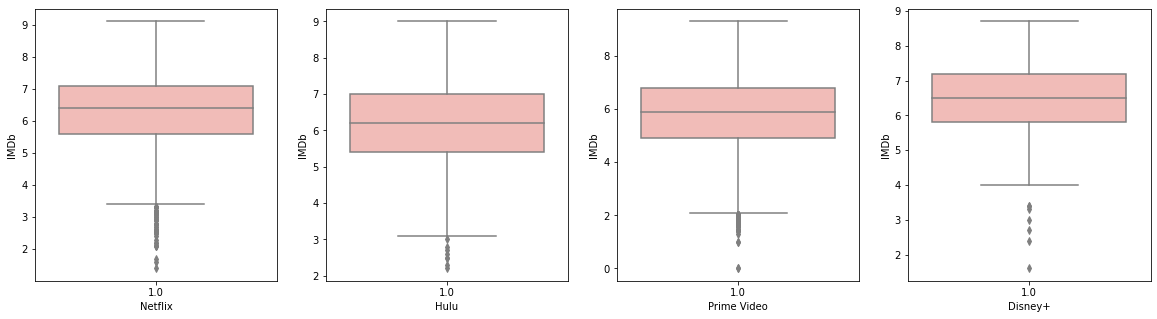

In [38]:
fig, axes = plt.subplots(ncols=4, figsize=(20,5))
sns.boxplot(x='Netflix',y='IMDb',data=movie, palette='Pastel1',ax=axes[0])
sns.boxplot(x='Hulu',y='IMDb',data=movie, palette='Pastel1',ax=axes[1])
sns.boxplot(x='Prime Video',y='IMDb',data=movie, palette='Pastel1',ax=axes[2])
sns.boxplot(x='Disney+',y='IMDb',data=movie,palette='Pastel1', ax=axes[3])

we can conclude that in Netflix we have the movies with the IMDb rating of 5.5 to 7.1 the most,

In Hulu we have 5.5 to 7.2 the most, in Prime Video we have 5 to 6.8 the most, and in Disney+ we have 5.8 to 7.1 the most.

This is the reason why Netflix of all the Streaming Services are most used in INDIA 

In [39]:
# Genre frequency
genre_col = df2["Genres"]
genre_col.dropna(inplace = True)
genre_col = [i.split(',') for i in genre_col]
genre_freq_dict, genre_freq_key_ls = {}, []
for wrow in genre_col:
    for _row in wrow:
        if _row not in genre_freq_key_ls:
            genre_freq_key_ls.append(_row)
            genre_freq_dict[_row] = 1
        else:
            counter = genre_freq_dict[_row]
            genre_freq_dict[_row] = counter + 1
print("Genre Frequency ->", genre_freq_dict)

# Channel frequency
channel_freq_dict, channel_freq_key_ls = {}, []
channel_ls = ["Netflix", "Hulu", "Prime Video", "Disney+"]
for channel in channel_ls:
    for _row in df[channel]:
        if int(_row) == 1:
            if channel not in channel_freq_key_ls:
                channel_freq_key_ls.append(channel)
                channel_freq_dict[channel] = 1
            else:
                counter = channel_freq_dict[channel]
                channel_freq_dict[channel] = counter + 1
print()
print("Channel Frequency ->", channel_freq_dict)

Genre Frequency -> {'Action': 2683, 'Adventure': 1778, 'Sci-Fi': 1228, 'Thriller': 3354, 'Comedy': 4637, 'Western': 499, 'Animation': 711, 'Family': 1514, 'Biography': 821, 'Drama': 7227, 'Music': 667, 'War': 539, 'Crime': 1833, 'Fantasy': 1089, 'Romance': 2359, 'History': 715, 'Mystery': 1274, 'Horror': 2201, 'Sport': 404, 'Documentary': 2546, 'Musical': 401, 'News': 105, 'Short': 386, 'Reality-TV': 22, 'Talk-Show': 19, 'Game-Show': 7, 'Film-Noir': 79}

Channel Frequency -> {'Netflix': 3560, 'Hulu': 903, 'Prime Video': 12354, 'Disney+': 564}


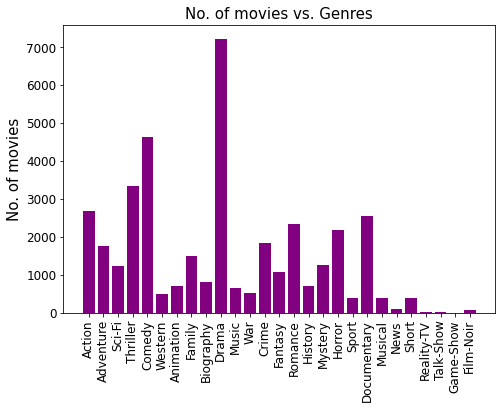

In [40]:
x_ax = [k for k in genre_freq_dict.keys()]
y_ax = [k for k in genre_freq_dict.values()]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
new_genre = x_ax
new_freq = y_ax
ax.bar(new_genre,new_freq, color = "purple")
plt.xticks(rotation='vertical')
plt.xticks(size = 12)
plt.yticks(size = 12)
ax.set_ylabel('No. of movies', size = 15)
ax.set_title('No. of movies vs. Genres', size = 15)
plt.show()

This Hints a overlap between Movies with high ratings, and the genre "Drama"